In [2]:
import time
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
import os, sys
import matplotlib.pyplot as plt
import gensim as gs
import numpy as np
#sys.path.insert(1,'C:/Users/Elisa/Documents/ELISA/MAGISTRALE/Tesi/master_thesis-master')

In [73]:
#df = pd.read_csv("C:/Users/Elisa/Documents/ELISA/MAGISTRALE/Tesi/Program/Myra_DV_all_genes/hvg_DV.csv", index_col=[0],)
#df = pd.read_csv("C:/Users/Elisa/Documents/ELISA/MAGISTRALE/Tesi/Myra_dataset/DVwithPredValsandGenex.csv", index_col=[0])
df = pd.read_csv("Myra_dataset/RPMnorm_avgALignedReplicates/new_AP_averaged_fitted_truncated.csv", index_col = [0])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60
0610009B22Rik,19.420641,19.379931,19.358186,19.355524,19.372063,19.407920,19.463214,19.538061,19.632581,19.746891,...,33.325488,34.130332,35.015333,35.984505,37.041858,38.191404,39.437155,40.783124,42.233320,43.791758
0610009E02Rik,0.480213,0.476795,0.475866,0.477323,0.481062,0.486981,0.494975,0.504942,0.516778,0.530380,...,1.068712,1.078816,1.089273,1.100047,1.111095,1.122380,1.133862,1.145501,1.157257,1.169092
0610009L18Rik,3.001458,2.970405,2.943494,2.920716,2.902062,2.887521,2.877084,2.870742,2.868485,2.870303,...,4.751238,4.973604,5.221293,5.495342,5.796788,6.126664,6.486008,6.875854,7.297240,7.751199
0610010F05Rik,22.727728,23.271856,23.804609,24.325304,24.833259,25.327790,25.808215,26.273850,26.724014,27.158023,...,47.637998,48.142654,48.589276,48.974972,49.296849,49.552013,49.737573,49.850634,49.888304,49.847690
0610010K14Rik,1.718949,1.798692,1.876832,1.953196,2.027614,2.099912,2.169919,2.237463,2.302371,2.364471,...,4.190846,4.174855,4.149917,4.115810,4.072316,4.019216,3.956290,3.883318,3.800082,3.706362


In [74]:
#random.seed(42)
df_scialdone=df.T
df_scialdone.shape

(60, 18498)

In [3]:
no_topics = 5

In [7]:
model = LatentDirichletAllocation(n_components = no_topics, doc_topic_prior= 50/no_topics, topic_word_prior=0.01, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

In [17]:
lda = model.fit(df) #remember the matrix must be n_samples x n_features

In [102]:
df_files = df_scialdone.index
#coord = []
#for item in df_files:
#     coord.append(item.split("V")[1])

#coord_DV = []
coord_AP = []
for item in df_files:
     #coord_DV.append(int(item.split("V")[1]))
     coord_AP.append(int(item.split("V")[1]))
    

#df_files = pd.DataFrame(df_files)
#df_files.insert(1,"DV_coord",coord_DV)
#df_files.columns = ['sample', 'DV_coord'] 
#df_files[df_files.keys()[1]].values

In [18]:
def display_topics(model, feature_names, df_files, no_top_words):
    clusters = np.empty([no_topics,no_top_words])
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))  
        g = 0
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        for i in topic.argsort()[:-no_top_words - 1:-1]:
            clusters[topic_idx][g] = df_files[df_files.keys()[1]].values[i]
            g += 1
    return clusters


In [ ]:
percentage = ((lda.components_[0]) / lda.components_[0].sum())
percentage


In [30]:
no_top_words = 15
groups = display_topics(lda, df.columns, df_files, no_top_words)
groups
#np.savetxt('C:/Users/Elisa/Documents/ELISA/MAGISTRALE/Tesi/Program/Myra_DV_all_genes/words_coord/DVscialdone_top_words_5topics.csv', groups, delimiter=',')

Topic 0:
V1 V4 V2 V5 V3 V32 V6 V10 V11 V7 V8 V12 V40 V9 V39
Topic 1:
V64 V61 V53 V70 V72 V68 V67 V54 V63 V62 V56 V71 V50 V55 V69
Topic 2:
V46 V35 V34 V43 V41 V48 V26 V52 V36 V45 V47 V28 V38 V33 V27
Topic 3:
V29 V21 V30 V23 V24 V22 V25 V39 V32 V16 V40 V15 V14 V13 V37
Topic 4:
V60 V66 V65 V59 V17 V19 V18 V20 V9 V12 V58 V13 V11 V10 V14


array([[ 1.,  4.,  2.,  5.,  3., 32.,  6., 10., 11.,  7.,  8., 12., 40.,
         9., 39.],
       [64., 61., 53., 70., 72., 68., 67., 54., 63., 62., 56., 71., 50.,
        55., 69.],
       [46., 35., 34., 43., 41., 48., 26., 52., 36., 45., 47., 28., 38.,
        33., 27.],
       [29., 21., 30., 23., 24., 22., 25., 39., 32., 16., 40., 15., 14.,
        13., 37.],
       [60., 66., 65., 59., 17., 19., 18., 20.,  9., 12., 58., 13., 11.,
        10., 14.]])

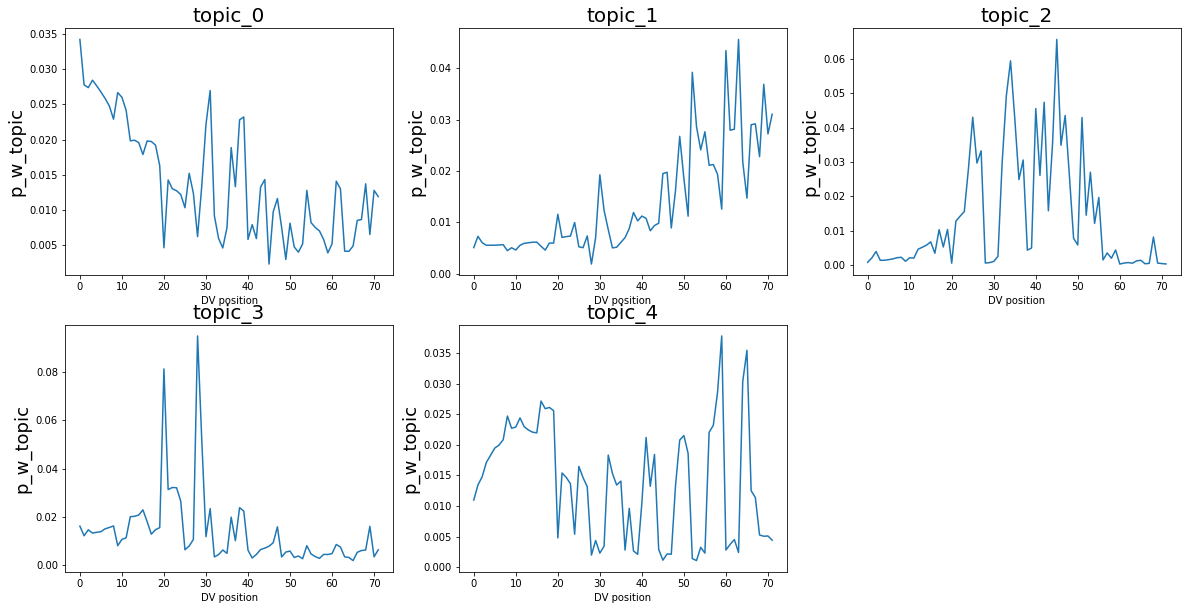

In [22]:
fig=plt.figure(figsize=(20,10))


x = df_files[df_files.keys()[1]].values

for i in range(no_topics):
    
    fig.add_subplot(2,3,i+1)
    
    #y = (lda.components_[0]) / lda.components_[0].sum()

    #plt.scatter(x,(lda.components_[i]) / lda.components_[i].sum(), label='topic_%s' %(i))
    plt.plot((lda.components_[i]) / lda.components_[i].sum())

#plt.ylim((y[y!=0].min(),y.max()))
#plt.xlim((x[x!=0].min(),x.max()))


    plt.xlabel("DV position", fontsize=10)
    plt.ylabel("p_w_topic", fontsize=18)
    plt.title("topic_%s" %(i),fontsize=20)

## Create null model

In [13]:
df_files_shuffled = df_files.copy()
np.random.shuffle(df_files_shuffled["DV_coord"])
coord_shuffled = list(df_files_shuffled['DV_coord'])
coord_shuffled

/home/eligara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[32,
 20,
 38,
 49,
 46,
 47,
 5,
 16,
 6,
 11,
 58,
 71,
 56,
 50,
 37,
 22,
 72,
 35,
 21,
 57,
 67,
 3,
 70,
 55,
 64,
 68,
 42,
 7,
 25,
 28,
 43,
 17,
 40,
 65,
 39,
 59,
 4,
 44,
 33,
 18,
 61,
 31,
 52,
 69,
 29,
 36,
 9,
 13,
 14,
 54,
 62,
 51,
 19,
 63,
 23,
 41,
 53,
 10,
 26,
 2,
 27,
 30,
 34,
 12,
 66,
 1,
 24,
 45,
 48,
 15,
 8,
 60]

In [16]:
df_random = df.copy()
df_random.columns = df_files_shuffled.DV_coord
df_random


DV_coord,32,20,38,49,46,47,5,16,6,11,...,34,12,66,1,24,45,48,15,8,60
Klf6,84.025909,77.177572,55.601055,77.871839,79.607643,81.160427,82.531338,83.722084,68.556075,92.361052,...,87.986213,65.930163,113.395215,24.059737,78.536351,80.329828,64.796037,74.888752,102.128443,91.657972
Scmh1,18.922725,16.977564,17.305535,19.293445,19.011989,18.684055,18.313535,17.904608,10.750955,20.616816,...,7.910388,9.707509,0.000000,17.185526,12.301974,12.617337,21.598679,11.198318,17.608352,10.428152
Cox5a,4.280140,77.638849,50.537931,60.000650,65.267074,69.949950,74.056907,77.595897,90.568113,73.545208,...,22.763066,7.685111,99.286133,93.661119,40.043686,39.246043,30.789606,43.393482,21.671818,21.679580
Fer,57.218715,21.012971,39.973520,43.070452,43.436915,43.677436,43.796272,43.798287,32.958622,45.458573,...,51.530631,50.964421,79.951465,39.526711,47.992809,48.671573,39.520987,68.589698,44.427227,35.400833
Gna12,23.878676,35.235686,22.638792,25.505533,25.618537,25.711311,25.780289,25.821934,12.292772,32.713049,...,43.840667,27.909088,43.372363,0.000000,30.478397,31.291713,35.844616,26.596005,43.885432,33.754283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm33447,3.604329,9.866847,0.437745,3.368478,3.056274,2.768891,2.505249,2.264272,0.106738,0.202112,...,2.985490,0.000000,0.000000,0.000000,0.230730,0.192918,0.000000,0.000000,0.000000,0.000000
Gm41177,4.505411,10.692534,0.437745,4.953426,5.045422,5.126209,5.194819,5.250370,3.415631,2.092095,...,4.792770,4.853754,0.000000,0.000000,3.780608,4.083088,1.838185,10.498423,4.334364,5.214076
Gm49336,54.515469,81.862866,70.229206,63.168387,60.966899,58.946846,57.108459,55.451537,44.124748,75.947563,...,103.429285,149.252947,4.703027,0.000000,81.717234,80.106173,36.304163,121.781708,87.499966,102.909400
sel_positions,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,...,63.000000,64.000000,65.000000,66.000000,67.000000,68.000000,69.000000,70.000000,71.000000,72.000000


In [31]:

lda_random = model.fit(df_random) 

In [32]:
cluster_sampling = display_topics(lda_random, df.columns, df_files_shuffled, no_top_words)
cluster_sampling

Topic 0:
V1 V4 V2 V5 V3 V32 V6 V10 V11 V7 V8 V12 V40 V9 V39
Topic 1:
V64 V61 V53 V70 V72 V68 V67 V54 V63 V62 V56 V71 V50 V55 V69
Topic 2:
V46 V35 V34 V43 V41 V48 V26 V52 V36 V45 V47 V28 V38 V33 V27
Topic 3:
V29 V21 V30 V23 V24 V22 V25 V39 V32 V16 V40 V15 V14 V13 V37
Topic 4:
V60 V66 V65 V59 V17 V19 V18 V20 V9 V12 V58 V13 V11 V10 V14


array([[45.,  8., 58., 67., 25., 72., 27.,  3., 34., 56., 21.,  1., 26.,
        52., 44.],
       [10., 60.,  5., 19., 39., 28., 41.,  2., 49., 16., 29., 68., 35.,
        42., 54.],
       [23., 24., 65., 30., 40., 47., 13., 51., 63.,  6., 31., 15., 37.,
        12., 59.],
       [43., 46., 57., 36.,  9., 55.,  4., 44., 72., 71., 26., 33., 18.,
        64., 61.],
       [38., 70.,  7., 62., 50., 22., 48., 69., 52.,  1., 66., 64., 34.,
         3., 18.]])

In [ ]:
## NON USARE PIU QUESTO

import random
cluster_sampling = np.empty([no_topics,no_top_words])
for i in range(no_topics):
    cluster_sampling[i] = random.sample(coord_shuffled, no_top_words)
cluster_sampling

In [33]:
def contig_in_group(groups, no_topics, no_top_words):
    result = np.zeros([no_topics])
    contig = 0
    for i in range(no_topics):
        distances = np.zeros([no_top_words,no_top_words])
           
        distances = np.zeros([no_top_words,no_top_words])
        for r in range(no_top_words):
            for j in range (no_top_words):
                    distances[r][j] = (groups[i][r] - groups[i][j])
        
        for t in range(no_top_words):
            if(contig > result[i]):
                    result[i] = contig
            countpos = 1
            countneg = 1
            contig = 0
            test = distances[t]
            while ((countpos <= no_top_words) or (countneg <= no_top_words)):
                    mat = np.isin(test, [countpos,-countneg])
                    element = test[mat]
                
                    if(len(element) == 0): 
                        countpos = no_top_words+1
                        countneg = no_top_words+1
                    elif (len(element)==1):
                        if (element[0] > 0): 
                            contig += 1
                            countpos += 1
                            countneg = no_top_words+1
                        elif (element[0] < 0):
                            contig += 1
                            countneg += 1
                            countpos = no_top_words+1
                
                    elif (len(element) == 2): 
                        contig += 2
                        countpos += 1
                        countneg += 1
    return result + 1
#distances[4]

In [34]:
contig_group = contig_in_group(groups,no_topics,no_top_words)
contig_sample = contig_in_group(cluster_sampling,no_topics,no_top_words)

print(contig_group, "\n", contig_sample)

[12.  6.  7.  6.  6.] 
 [3. 2. 3. 3. 2.]


In [36]:
def diameter_group(groups, no_topics):
    stat = np.empty([no_topics,4])
    for i in range(no_topics):
        stat[i][0] = np.mean(groups[i])
        stat[i][1] = np.median(groups[i])
        stat[i][2] = np.std(groups[i])
        stat[i][3] = np.max(abs(groups[i] - np.mean(groups[i])))
    clusters = pd.DataFrame(stat)
    clusters.columns = ['mean', 'median', 'stdev','diameter']
    return clusters
        
 

In [37]:
groups_dist = diameter_group(groups, no_topics)
groups_dist

,mean,median,stdev,diameter
0,12.600000,8.0,12.684899,27.400000
1,62.333333,63.0,6.992059,12.333333
2,38.600000,38.0,7.906116,13.400000
3,25.333333,24.0,8.676917,14.666667
4,30.066667,18.0,22.584557,35.933333


In [38]:
sampling_dist = diameter_group(cluster_sampling, no_topics)
sampling_dist

,mean,median,stdev,diameter
0,35.933333,34.0,21.864634,36.066667
1,33.133333,35.0,19.383383,34.866667
2,34.400000,31.0,18.696880,30.600000
3,42.600000,44.0,20.780760,38.600000
4,40.266667,48.0,23.959596,39.266667


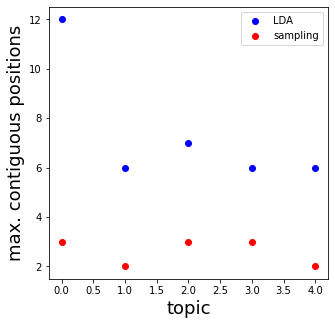

In [48]:
fig = plt.figure(figsize=(5,5))

plt.plot(contig_group, 'bo',label='LDA')
plt.plot(contig_sample, 'ro',label='sampling')

plt.xlabel("topic", fontsize=18)
plt.ylabel("max. contiguous positions", fontsize=18)
plt.legend(fontsize=10)
plt.savefig('LDAvsNull/words_coord/DVscialdone_LDAvsnull_contig_top15.png')
plt.show()

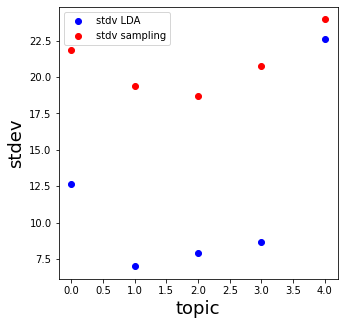

In [50]:
fig = plt.figure(figsize=(5,5))

plt.plot(groups_dist.loc[:,'stdev'],'bo',label='stdv LDA')
plt.plot(sampling_dist.loc[:,'stdev'],'ro',label='stdv sampling')

plt.xlabel("topic", fontsize=18)
plt.ylabel("stdev", fontsize=18)
plt.legend(fontsize=10)
plt.savefig('LDAvsNull/words_coord/DVscialdone_LDAvsnull_stdv_top15.png')
plt.show()

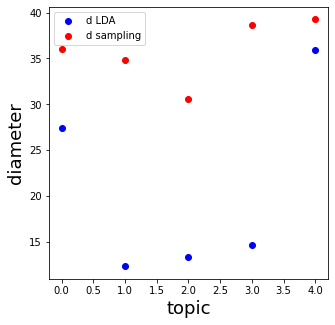

In [53]:
fig = plt.figure(figsize=(5,5))

plt.plot(groups_dist.loc[:,'diameter'],'bo',label='d LDA')
plt.plot(sampling_dist.loc[:,'diameter'],'ro',label='d sampling')

plt.xlabel("topic", fontsize=18)
plt.ylabel("diameter", fontsize=18)
plt.legend(fontsize=10)
plt.savefig('LDAvsNull/words_coord/DVscialdone_LDAvsnull_d_top15.png')
plt.show()

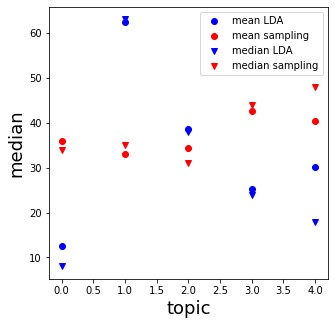

In [58]:
fig = plt.figure(figsize=(5,5))

plt.plot(groups_dist.loc[:,'mean'],'bo',label='mean LDA')
plt.plot(sampling_dist.loc[:,'mean'],'ro',label='mean sampling')
plt.plot(groups_dist.loc[:,'median'],'bv',label='median LDA')
plt.plot(sampling_dist.loc[:,'median'],'rv',label='median sampling')
plt.xlabel("topic", fontsize=18)
plt.ylabel("median", fontsize=18)
plt.legend(fontsize=10)
plt.savefig('LDAvsNULL/words_coord/DVscialdone_LDAvsnull_mean_top15.png')
plt.show()

## with gensim

In [84]:
import random
random.seed(42)
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import get_tmpfile
from gensim.corpora import MmCorpus
from sklearn.cluster import KMeans
import pprint

In [18]:
corpus=list(map(list,map(lambda x: list(zip(range(len(df.index)), df[x])),df.columns)))
dictionary=Dictionary([df.index])
corpus_random=list(map(list,map(lambda x: list(zip(range(len(df_random.index)), df_random[x])),df_random.columns)))
dictionary_random=Dictionary([df_random.index])

In [19]:
no_topics = 12

start = time.time()

#training model
#lda_gensim = LdaModel(corpus, num_topics=no_topics, alpha = 0.01, eta = 50/no_topics)
lda_gensim = LdaModel(corpus, num_topics=no_topics, iterations=100,  passes=10, eta = 0.01, alpha = 50/no_topics, id2word=dictionary)

lda_gensim_random = LdaModel(corpus_random, num_topics=no_topics, iterations=100,  passes=10, eta = 0.01, alpha = 50/no_topics, id2word=dictionary_random)
print("it took ", time.time()-start, "seconds")

it took  83.54971480369568 seconds


In [20]:
def display_topic_words(model,dictionary,no_topics,no_words, scialdone = True):
  
    #word_per_topic = np.empty(no_topics,dtype=object)
    clusters = np.empty([1,no_words])
    for i in range(no_topics):
        print ("Topic %d:" % (i))
        word_counts = model.get_topic_terms(i,topn=no_words)
        print (" ".join(str([dictionary[field],value])
                        for field, value in word_counts))
        g = 0
        if(scialdone):
            
            topic_top_words = []
            for line in word_counts:               
                
                #clusters[i][g] = (dictionary[line[0]])#.split("-")[0]
                topic_top_words.append(dictionary[line[0]])
                              
                #g += 1
            clusters = np.vstack((clusters, topic_top_words))
    
    if(scialdone):
        return clusters[1:]  

In [21]:
groups = display_topic_words(lda_gensim,dictionary,no_topics,10)
groups_random = display_topic_words(lda_gensim_random,dictionary_random,no_topics,10)
print(groups,groups_random)

Topic 0:
['Rnase1', 0.05752386] ['Tbl1xr1', 0.05116299] ['Gm9726', 0.026764866] ['Rps26', 0.025119241] ['Glb1l2', 0.015037604] ['2210408I21Rik', 0.014835904] ['Gkap1', 0.013610798] ['Zbp1', 0.012605485] ['Sclt1', 0.01163603] ['Rps27l', 0.007459036]
Topic 1:
['Rps26', 0.038610883] ['Zbp1', 0.036842264] ['Gm9726', 0.020540535] ['Cenpi', 0.011668274] ['Agpat4', 0.011270278] ['Gsk3b', 0.010238195] ['Nob1', 0.0091747735] ['Ndufa12', 0.008299316] ['Dkk2', 0.00711918] ['Slc26a1', 0.007033168]
Topic 2:
['Sclt1', 0.05087487] ['Rps26', 0.04394794] ['Scmh1', 0.018821891] ['Zbp1', 0.01693059] ['2210408I21Rik', 0.014665794] ['Gm9726', 0.011842926] ['Cenpi', 0.010919661] ['Scel', 0.010718262] ['Scd2', 0.010328892] ['Rps27l', 0.009339123]
Topic 3:
['Rps26', 0.07541994] ['Rps4x-ps', 0.03300997] ['Rps27l', 0.026838597] ['Rps26-ps1', 0.02007579] ['Rps3a2', 0.014078523] ['Gcsh', 0.01240071] ['sel_positions', 0.012130561] ['Psmd5', 0.009535044] ['Nob1', 0.008022745] ['Rps27a', 0.006067922]
Topic 4:
['Rps2

In [22]:
def doc_clustering_kmean(model, corpus, no_topics, no_clusters):
    clusters = np.zeros([len(corpus), no_topics])
    for idx in range(len(corpus)):
        topic_per_doc = model.get_document_topics(corpus[idx])
        for v in range(len(topic_per_doc)):
            g = topic_per_doc[v][0]
            clusters[idx][g] = topic_per_doc[v][1]
                
        #highest_topic = np.argmax(a, axis = 0)[1]
        #clusters[idx] = highest_topic 
        
    kmeans = KMeans(n_clusters=no_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    pred_y = kmeans.fit_predict(clusters)
    
    return clusters, kmeans, pred_y

In [23]:
no_clusters = 5
doc_per_topic, kmeans, pred_groups = doc_clustering_kmean(lda_gensim, corpus, no_topics, no_clusters)
df_d_per_t = pd.DataFrame(doc_per_topic)
df_d_per_t.set_index(df.columns)

,0,1,2,3,4,5,6,7,8,9,10,11
V1,0.000000,0.410737,0.0,0.000000,0.0,0.000000,0.579261,0.000000,0.000000,0.000000,0.000000,0.000000
V2,0.000000,0.555130,0.0,0.059285,0.0,0.000000,0.338655,0.000000,0.024246,0.000000,0.000000,0.000000
V3,0.000000,0.596672,0.0,0.012572,0.0,0.021282,0.281174,0.016609,0.050863,0.018285,0.000000,0.000000
V4,0.000000,0.681554,0.0,0.000000,0.0,0.000000,0.303440,0.000000,0.000000,0.000000,0.000000,0.000000
V5,0.000000,0.719841,0.0,0.000000,0.0,0.000000,0.248789,0.000000,0.011317,0.010487,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
V68,0.000000,0.000000,0.0,0.643232,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.203738,0.141292
V69,0.010231,0.000000,0.0,0.828765,0.0,0.000000,0.020939,0.137130,0.000000,0.000000,0.000000,0.000000
V70,0.000000,0.000000,0.0,0.518943,0.0,0.000000,0.000000,0.000000,0.000000,0.099526,0.000000,0.377258
V71,0.000000,0.000000,0.0,0.972340,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.016678,0.000000


In [24]:
doc_per_topic_random, kmeans_random, pred_groups_random = doc_clustering_kmean(lda_gensim_random, corpus_random, no_topics, no_clusters)
df_d_per_t_random = pd.DataFrame(doc_per_topic_random)
df_d_per_t_random.set_index(df_random.columns)

,0,1,2,3,4,5,6,7,8,9,10,11
DV_coord,,,,,,,,,,,,
32,0.000000,0.000000,0.737041,0.000000,0.000000,0.257432,0.0,0.00000,0.000000,0.000000,0.000000,0.00000
20,0.037224,0.049524,0.504215,0.000000,0.011167,0.357858,0.0,0.00000,0.000000,0.020498,0.012554,0.00000
38,0.085271,0.013710,0.474001,0.000000,0.028380,0.346551,0.0,0.00000,0.000000,0.000000,0.034447,0.00000
49,0.037394,0.000000,0.489438,0.000000,0.000000,0.447276,0.0,0.00000,0.000000,0.000000,0.000000,0.00000
46,0.057149,0.000000,0.447279,0.021094,0.000000,0.446285,0.0,0.00000,0.000000,0.000000,0.000000,0.01054
...,...,...,...,...,...,...,...,...,...,...,...,...
45,0.000000,0.417691,0.039480,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.534833,0.000000,0.00000
48,0.000000,0.210574,0.140732,0.000000,0.000000,0.000000,0.0,0.13432,0.010549,0.497846,0.000000,0.00000
15,0.000000,0.815627,0.023938,0.023539,0.000000,0.000000,0.0,0.00000,0.000000,0.135734,0.000000,0.00000


In [25]:

groups = [[],[],[],[],[]]
for idx, value in enumerate(pred_groups):
       
        groups[value].append(coord_DV[idx])
groups = np.array(groups)
groups

array([list([42, 49, 50, 51, 53, 57, 58, 59, 60, 61, 64, 65, 66]),
       list([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
       list([62, 63, 67, 68, 69, 70, 71, 72]),
       list([21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 37, 38, 39, 40, 41, 44, 45, 46, 47, 48, 54, 55, 56]),
       list([26, 27, 34, 35, 36, 43, 52])], dtype=object)

In [26]:
coord_shuffled

[32,
 20,
 38,
 49,
 46,
 47,
 5,
 16,
 6,
 11,
 58,
 71,
 56,
 50,
 37,
 22,
 72,
 35,
 21,
 57,
 67,
 3,
 70,
 55,
 64,
 68,
 42,
 7,
 25,
 28,
 43,
 17,
 40,
 65,
 39,
 59,
 4,
 44,
 33,
 18,
 61,
 31,
 52,
 69,
 29,
 36,
 9,
 13,
 14,
 54,
 62,
 51,
 19,
 63,
 23,
 41,
 53,
 10,
 26,
 2,
 27,
 30,
 34,
 12,
 66,
 1,
 24,
 45,
 48,
 15,
 8,
 60]

In [87]:

groups_random = [[],[],[],[],[]]
for idx, value in enumerate(pred_groups_random):
        groups_random[value].append(coord_shuffled[idx])
#groups = np.array(groups)
groups_random

[[4, 13, 59, 15, 12, 65, 24, 63, 37, 40, 30, 6, 23, 31, 47, 51],
 [46, 55, 36, 9, 43, 57, 17, 72, 61, 44, 26, 14, 11, 32, 35, 20, 5, 2, 42, 29],
 [60, 16, 49, 10, 41, 28, 54, 19, 68, 39],
 [45, 58, 25, 8, 67, 27, 56, 21, 52, 3, 34, 1, 64, 18, 33, 71, 50, 48, 22, 69],
 [53, 66, 62, 38, 7, 70]]

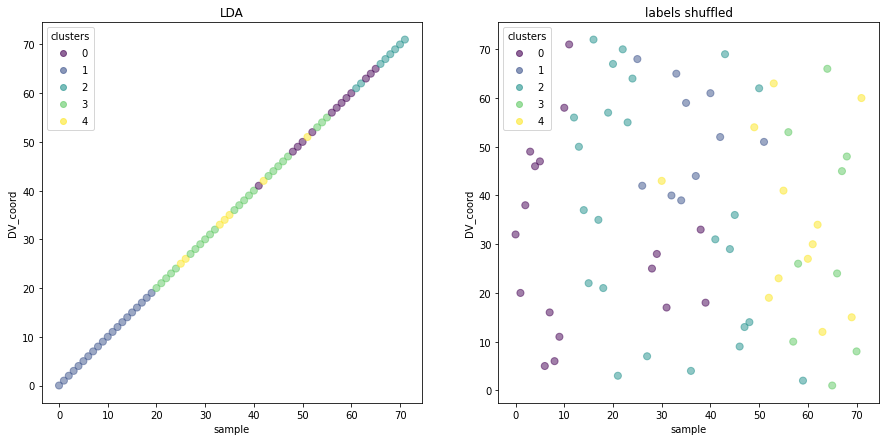

In [27]:
centroids = kmeans.cluster_centers_
fig = plt.figure(figsize=(15,7))
plt.subplot(121)
scatter = plt.scatter(range(len(df_d_per_t.index)), df_d_per_t.index, c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.xlabel("sample",fontsize = 10)
plt.ylabel("DV_coord",fontsize = 10)
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend = plt.legend(handles, labels, loc="upper left", title="clusters")
plt.title("LDA")
plt.subplot(122)
scatter_random = plt.scatter(range(len(df_d_per_t_random.index)), coord_shuffled, c = kmeans_random.labels_.astype(float), s=50, alpha=0.5)
plt.ylabel("DV_coord",fontsize = 10)
plt.xlabel("sample",fontsize = 10)
plt.title("labels shuffled")
handles, labels = scatter_random.legend_elements(prop="colors", alpha=0.6)
legend_random = plt.legend(handles, labels,loc="upper left", title="clusters")
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
#plt.savefig('LDAvsNull/ldavsshuffled_clusters_5zones.png')
plt.show()

In [32]:
print(pred_groups, "\n", pred_groups_random)
np.unique(pred_groups)
for i in range(5):
    print("\n cluster %s \n " %(i), np.where(pred_groups == i), "\n shuffled: \n",np.where(pred_groups_random == i))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 4 4 3 3 3 3 3 3 4 4 4 3
 3 3 3 3 0 4 3 3 3 3 3 0 0 0 4 0 3 3 3 0 0 0 0 0 2 2 0 0 0 2 2 2 2 2 2] 
 [0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 0 0 4 0 1 1 1 1 2
 1 0 0 1 2 1 2 2 2 2 2 2 4 2 1 4 4 4 4 3 3 3 2 4 4 4 4 3 3 3 3 3 4 3 4]


array([0, 1, 2, 3, 4], dtype=int32)

## For hSBM

In [82]:
import importlib#, sbmtm_developer
#import graph_tool.all as gt
import pickle, math
import seaborn as sns

In [83]:
#model_DV = pickle.load(open('hsbm_svg/20_04/topsbm.pkl','rb'))
#p_tw_w_l1 = pd.read_csv('hsbm_DV_svg/20_04/p_tw_w_l1.csv', index_col = [0])
p_tw_w_l0 = pd.read_csv('hsbm_NewDataset/AP_top1000svg_x1000ln/topsbm_level_0_word-dist.csv', index_col = [0])
no_topics = len(p_tw_w_l0.index)
p_tw_w_l0

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
V1,0.498996,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
V2,0.501004,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
V3,0.000000,0.333111,0.000000,0.000000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
V4,0.000000,0.333444,0.000000,0.000000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
V5,0.000000,0.333444,0.000000,0.000000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
V6,0.000000,0.000000,0.333333,0.000000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
V7,0.000000,0.000000,0.333333,0.000000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
V8,0.000000,0.000000,0.333333,0.000000,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
V9,0.000000,0.000000,0.000000,0.111111,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.000000
V10,0.000000,0.000000,0.000000,0.111111,0.00000,0.000000,0.00,0.0,0.000000,0.000000,0.000000


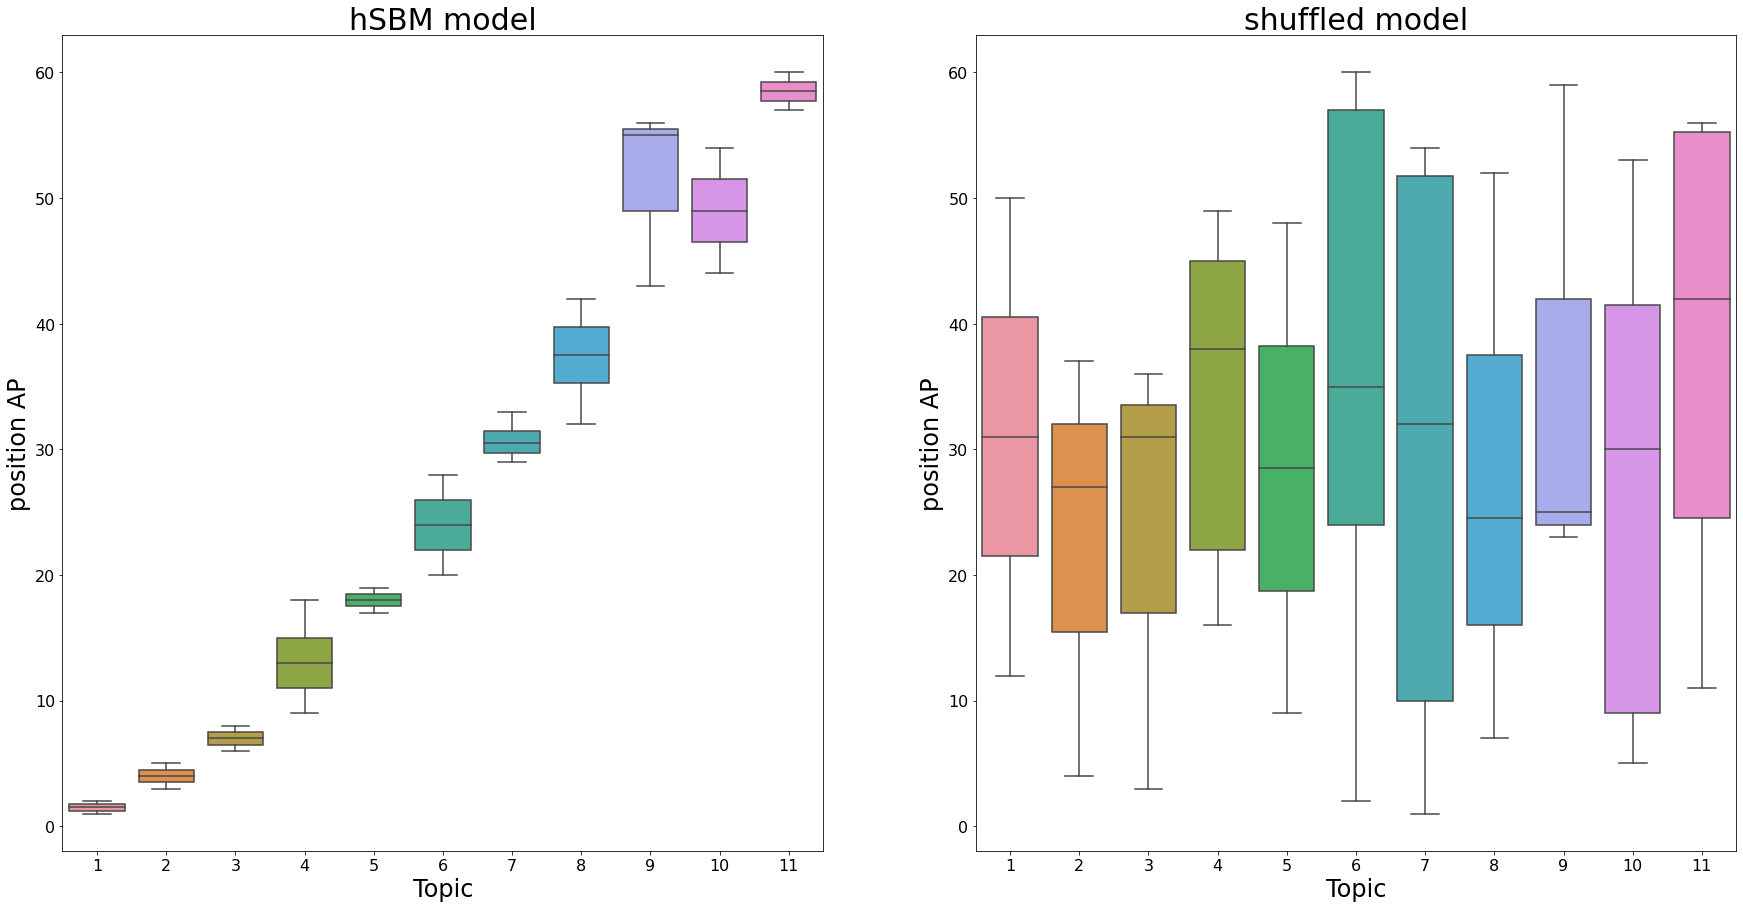

In [115]:
#for topic in range(no_topics):#no_topics_1):


coord = []
rand_coord = []
t = []


for pos in range(len(p_tw_w_l0.index)):
            
    coord.append(coord_AP[pos])
    rand_coord.append(coord_shuffled[pos])
    t.append(np.nonzero(p_tw_w_l0.iloc[pos,:].values)[0][0] + 1)
    
 
a = dict([('AP_coord', coord), ('topic', t), ('shuffled_coord', rand_coord)]) 
Top = pd.DataFrame.from_dict(a)

fig = plt.figure(figsize=(30,15))
plt.subplot(121)        
ax = sns.boxplot(x = "topic", y = "AP_coord", data = Top )#genes_per_topics_l1.iloc[np.isin(df_scialdone.columns,a)])
ax.set_title("hSBM model",fontsize = 30)
ax.set_xlabel('Topic', fontsize = 24)
ax.set_ylabel('position AP', fontsize = 24)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.subplot(122)   
ax = sns.boxplot(x = "topic", y = "shuffled_coord", data = Top )  
ax.set_title("shuffled model",fontsize = 30)
ax.set_xlabel('Topic', fontsize = 24)
ax.set_ylabel('position AP', fontsize = 24)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.savefig("plots/hsbm_newAP_nullmodel.png" )#%(topic,top_genes_per_topics[2,i]))
  

plt.show()

In [99]:
coord_shuffled = np.random.shuffle(np.array(coord_AP))

In [101]:
coord_shuffled = coord_AP